In [1]:
# Init if needed
using Pkg
Pkg.activate("../.") # QEPOptimize/ instead of QEPOptimize/example/
Pkg.instantiate()


  Activating project at `~/Research/krastanov_lab/QEPOptimize`


In [2]:
using QEPO.Visualizer: display_top_circuits,plot_performance_metrics
using QEPO.Configurable
using QEPO.Optimizer

## Configuration


In [3]:
# Custom parameters
dataPath = "../QEPO/data/ibm_sherbrooke_calibrations_2024-10-09.csv"
valid_qubits::Array{Int} = ([ 43, 44, 45, 46, 47,  48, 49, 50])
hw_cfg = HardwareConfiguration(dataPath,valid_qubits)
adv_cfg = AdvancedConfiguration()
adv_cfg.population_size = 20
adv_cfg.children_per_pair = 2
adv_cfg.starting_pop_multiplier = 100
adv_cfg.starting_ops = 7
adv_cfg.communication_fidelity_in = .8
adv_cfg.p_add_operation = .2
config = Configuration(hw_cfg,adv_cfg)

# Main parameters
config.raw_bell_pairs = 4
config.num_registers = 4
config.max_ops = 10
config.num_simulations = 5000
config.max_gen = 10

# Optimization target 
config.optimize_for = purified_pairs_fidelity
# config.optimize_for = logical_qubit_fidelity
# config.optimize_for = average_marginal_fidelity


purified_pairs_fidelity::CostFunction = 1

## Optimization


In [4]:
# Reset genetic optimizer population
pop = Population()

Population(Individual[], Dict{String, Vector{Int64}}())

Running process: generation 1
Running process: generation 2
Running process: generation 3
Running process: generation 4
Running process: generation 5
Running process: generation 6
Running process: generation 7
Running process: generation 8
Running process: generation 9
Running process: generation 10


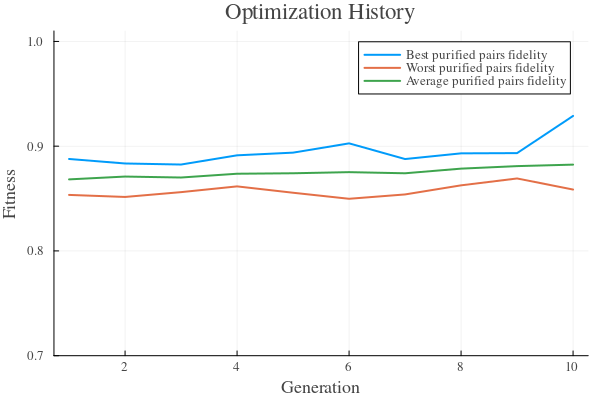

In [5]:
# Optimize the population and plot trend of results
run_with_constraints_history!(pop,config)

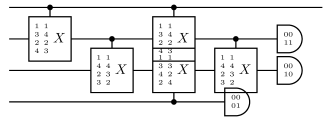

Performance([0.9288956127080181, 0.07110438729198185], 0.9288956127080181, 1.0, 0.9288956127080181, 0.3966)
Performance([0.897257089725709, 0.10274291027429103], 0.897257089725709, 1.0, 0.897257089725709, 0.4302)
Performance([0.8931682714351215, 0.10683172856487849], 0.8931682714351215, 1.0, 0.8931682714351215, 0.4362)


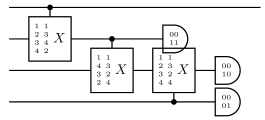

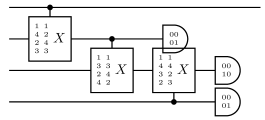

In [6]:
# View the top 3 circuits
display_top_circuits(pop.individuals,3)

In [7]:
# Get the operations of the top circuit
ops = pop.individuals[1].ops
for op in ops
    print(op,"\n")
end

BPGates.PauliNoiseBellGate{BPGates.CNOTPerm}(BPGates.CNOTPerm(3, 5, 1, 2), 0.0016232274061988388, 0.0016232274061988388, 0.0016232274061988388)
BPGates.PauliNoiseBellGate{BPGates.CNOTPerm}(BPGates.CNOTPerm(5, 6, 2, 3), 0.002955235081735052, 0.002955235081735052, 0.002955235081735052)
BPGates.PauliNoiseBellGate{BPGates.CNOTPerm}(BPGates.CNOTPerm(4, 3, 4, 3), 0.0027975865743341466, 0.0027975865743341466, 0.0027975865743341466)
BPGates.PauliNoiseBellGate{BPGates.CNOTPerm}(BPGates.CNOTPerm(3, 5, 1, 2), 0.0016232274061988388, 0.0016232274061988388, 0.0016232274061988388)
BPGates.PauliNoiseBellGate{BPGates.CNOTPerm}(BPGates.CNOTPerm(5, 6, 2, 3), 0.002955235081735052, 0.002955235081735052, 0.002955235081735052)
BPGates.NoisyBellMeasureNoisyReset(BPGates.BellMeasure(3, 3), 0.019603000000000002, 0.25, 0.25, 0.25)
BPGates.NoisyBellMeasureNoisyReset(BPGates.BellMeasure(1, 4), 0.02531267, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665)
BPGates.NoisyBellMeasureNoisyReset(BPGates.Bell